## Deep Learning EEG

0926_Week4_EEG.ipynb에서 만든 eeg_result_combined.csv파일을 가져와 train test split 후 DL을 수행해보자.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import models, layers
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Project/MachineLearning/Result/eeg_result_combined.csv", encoding='cp949') # \는 콜백문자 때문에 \\로 사용한다.
df

,mean,std,median,mean2,std2,median2,EEG
0,397.587891,228.156137,387.0,210131.353516,226674.550429,149769.0,1
1,490.419922,387.684615,399.0,390811.060547,676477.249957,159201.0,1
2,183.037109,131.929301,173.0,50907.923828,89385.029886,29929.0,1
3,140.076172,94.416030,130.0,28535.720703,34899.483404,16900.0,1
4,27.093750,19.306810,24.0,1106.824219,1409.293350,576.0,0
...,...,...,...,...,...,...,...
1595,53.630859,28.627021,52.0,3695.775391,3444.183525,2704.0,0
1596,19.496094,15.681522,15.0,626.007812,925.451651,225.0,0
1597,36.755859,26.725547,32.0,2065.248047,2544.590834,1024.0,0
1598,27.958984,20.891841,24.5,1218.173828,1621.430200,600.5,0


In [2]:
X=df.drop('EEG', axis=1)
X.head()

,mean,std,median,mean2,std2,median2
0,397.587891,228.156137,387.0,210131.353516,226674.550429,149769.0
1,490.419922,387.684615,399.0,390811.060547,676477.249957,159201.0
2,183.037109,131.929301,173.0,50907.923828,89385.029886,29929.0
3,140.076172,94.416030,130.0,28535.720703,34899.483404,16900.0
4,27.093750,19.306810,24.0,1106.824219,1409.293350,576.0


In [3]:
y=df['EEG']
y.value_counts()

1    800
0    800
Name: EEG, dtype: int64

In [4]:
y = pd.get_dummies(y).values
y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]], dtype=uint8)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.head()

,mean,std,median,mean2,std2,median2
728,166.699219,110.905714,147.0,40088.707031,46777.919566,21609.0
48,89.533203,64.798326,79.5,12215.017578,14100.659340,6320.5
644,30.251953,21.597006,26.0,1381.611328,1712.054194,676.0
615,328.052734,211.013549,325.0,152145.314453,180005.953860,105625.0
757,17.726562,12.796768,16.0,477.988281,636.574079,256.0


In [6]:
y_train

array([[0, 1],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [7]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from tensorflow.keras import layers

In [8]:
# Define the input layer
inputs = Input(shape=(X_train.shape[1],))

# Define the model architecture
x = Dense(16, activation='relu')(inputs)
x = Dense(16, activation='relu')(x)
predictions = Dense(2, activation='sigmoid')(x) 

# Create the model
model = Model(inputs=inputs, outputs=predictions)

# Compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense (Dense)               (None, 16)                112       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 418 (1.63 KB)
Trainable params: 418 (1.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model_history=model.fit(x=X_train, y=y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1) # 배열에서 최댓값을 가지는 원소의 인덱스를 반환하는 함수
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/50


40/40 [==============================] - 1s 9ms/step - loss: 2642.6211 - accuracy: 0.4734 - val_loss: 121.9192 - val_accuracy: 0.5281
Epoch 2/50
40/40 [==============================] - 0s 1ms/step - loss: 126.5106 - accuracy: 0.4930 - val_loss: 117.2870 - val_accuracy: 0.5281
Epoch 3/50
40/40 [==============================] - 0s 1ms/step - loss: 104.4255 - accuracy: 0.4930 - val_loss: 89.1588 - val_accuracy: 0.5281
Epoch 4/50
40/40 [==============================] - 0s 1ms/step - loss: 73.4447 - accuracy: 0.4930 - val_loss: 57.1272 - val_accuracy: 0.5281
Epoch 5/50
40/40 [==============================] - 0s 1ms/step - loss: 50.8227 - accuracy: 0.4914 - val_loss: 40.8329 - val_accuracy: 0.5281
Epoch 6/50
40/40 [==============================] - 0s 1ms/step - loss: 42.6324 - accuracy: 0.4922 - val_loss: 35.3558 - val_accuracy: 0.5281
Epoch 7/50
40/40 [==============================] - 0s 1ms/step - loss: 32.8257 - accuracy: 0.4906 - val_loss: 31.0271 - val_accuracy: 0.528

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 792us/step - loss: 0.7153 - accuracy: 0.9719


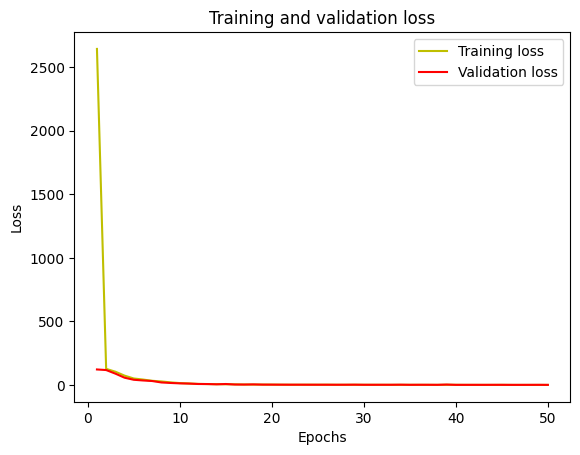

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

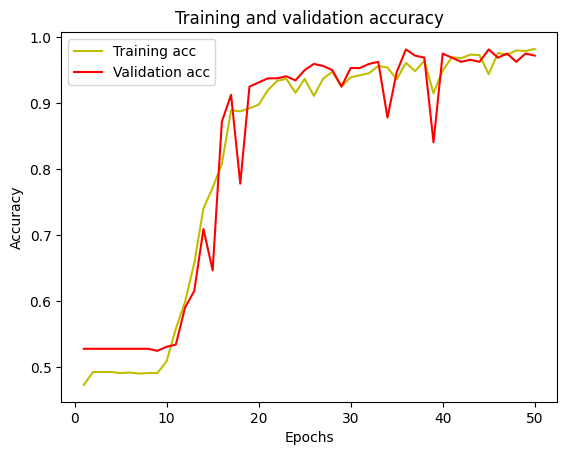

In [12]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       151
           1       0.95      0.99      0.97       169

    accuracy                           0.97       320
   macro avg       0.97      0.97      0.97       320
weighted avg       0.97      0.97      0.97       320

[[143   8]
 [  1 168]]
